In [11]:
import pandas as pd

data = pd.read_csv('../data/cleaned_data_with_clusters.csv')

In [12]:
data

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,...,country,lat_appx_lots_of_err,long_appx_lots_of_err,O score,C score,E score,A score,N score,KMeans_Cluster,GMM_Cluster
0,0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,...,GB,51.5448,0.1991,33.0,32.0,30.0,31.0,24.0,0,1
1,1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,...,MY,3.1698,101.7060,27.0,31.0,34.0,32.0,21.0,3,1
2,2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,...,GB,54.9119,-1.3833,31.0,28.0,29.0,28.0,26.0,3,1
3,3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,...,GB,51.7500,-1.2500,31.0,27.0,26.0,32.0,27.0,3,1
4,5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,...,SE,59.3333,18.0500,32.0,29.0,30.0,28.0,22.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695699,1015334,4.0,1.0,4.0,2.0,4.0,3.0,3.0,2.0,3.0,...,GB,52.4189,-1.5054,34.0,32.0,28.0,36.0,28.0,0,1
695700,1015335,5.0,1.0,5.0,2.0,4.0,2.0,3.0,1.0,5.0,...,TR,41.0186,28.9647,32.0,33.0,29.0,35.0,42.0,2,2
695701,1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,...,US,38.0000,-97.0000,33.0,28.0,34.0,33.0,40.0,4,2
695702,1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,...,US,34.1067,-117.8067,35.0,30.0,28.0,31.0,33.0,1,2


In [13]:
# Create 'data_kmeans': Drop the last column
data_kmeans = data.iloc[:, :-1].copy()
data_kmeans.rename(columns={data_kmeans.columns[-1]: "cluster"}, inplace=True)

# Create 'data_gmm': Drop the second-to-last column
data_gmm = data.drop(columns=data.columns[-2]).copy()
data_gmm.rename(columns={data_gmm.columns[-1]: "cluster"}, inplace=True)

# Display results
print("data_kmeans:\n", data_kmeans.head())
print("\ndata_gmm:\n", data_gmm.head())


data_kmeans:
    Unnamed: 0  EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  ...  IPC  \
0           0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0  ...    1   
1           1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0  ...    1   
2           2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0  ...    1   
3           3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0  ...    1   
4           5   3.0   3.0   4.0   2.0   4.0   2.0   2.0   3.0   3.0  ...    1   

   country  lat_appx_lots_of_err  long_appx_lots_of_err  O score  C score  \
0       GB               51.5448                 0.1991     33.0     32.0   
1       MY                3.1698               101.7060     27.0     31.0   
2       GB               54.9119                -1.3833     31.0     28.0   
3       GB               51.7500                -1.2500     31.0     27.0   
4       SE               59.3333                18.0500     32.0     29.0   

   E score  A score  N score  cluste

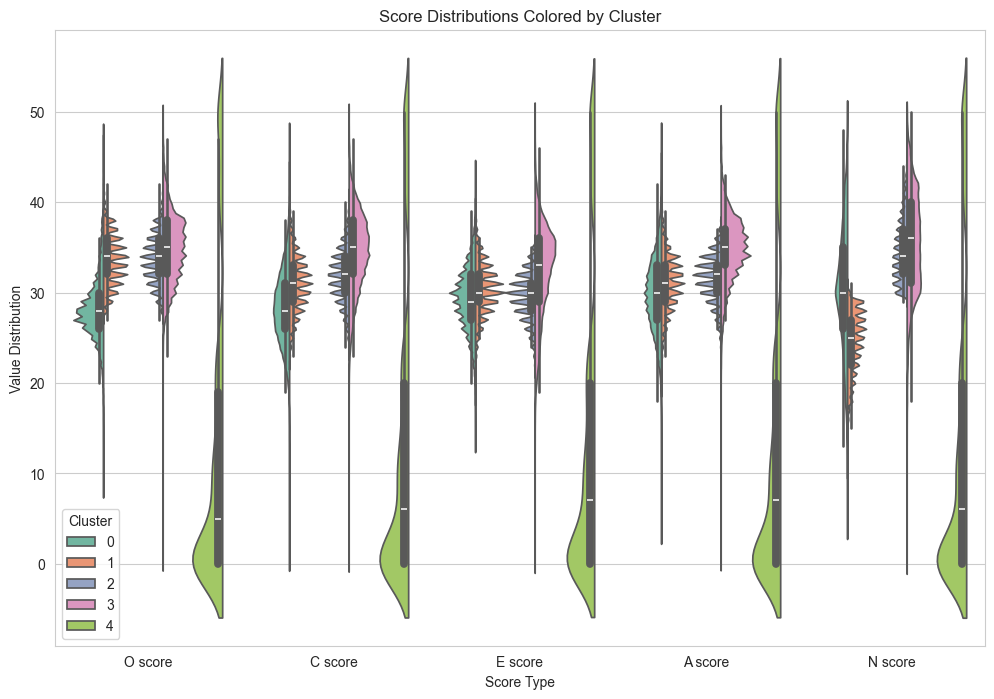

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the last 5 columns before 'cluster'
score_data = data_gmm.iloc[:, -6:-1]  # Last 6th to last 2nd column
score_data["cluster"] = data_gmm["cluster"]  # Add cluster labels

# Melt the dataframe for seaborn plotting
df_melted = score_data.melt(id_vars="cluster", var_name="Score", value_name="Value")

# Set up the color palette (one color per cluster)
num_clusters = score_data["cluster"].nunique()
palette = sns.color_palette("Set2", num_clusters)  # Adjust as needed

# Create the plot
plt.figure(figsize=(12, 8))
sns.violinplot(x="Score", y="Value", hue="cluster", data=df_melted, split=True, palette=palette)

# Styling
plt.title("Score Distributions Colored by Cluster")
plt.xlabel("Score Type")
plt.ylabel("Value Distribution")
plt.legend(title="Cluster")

# Show the plot
plt.show()


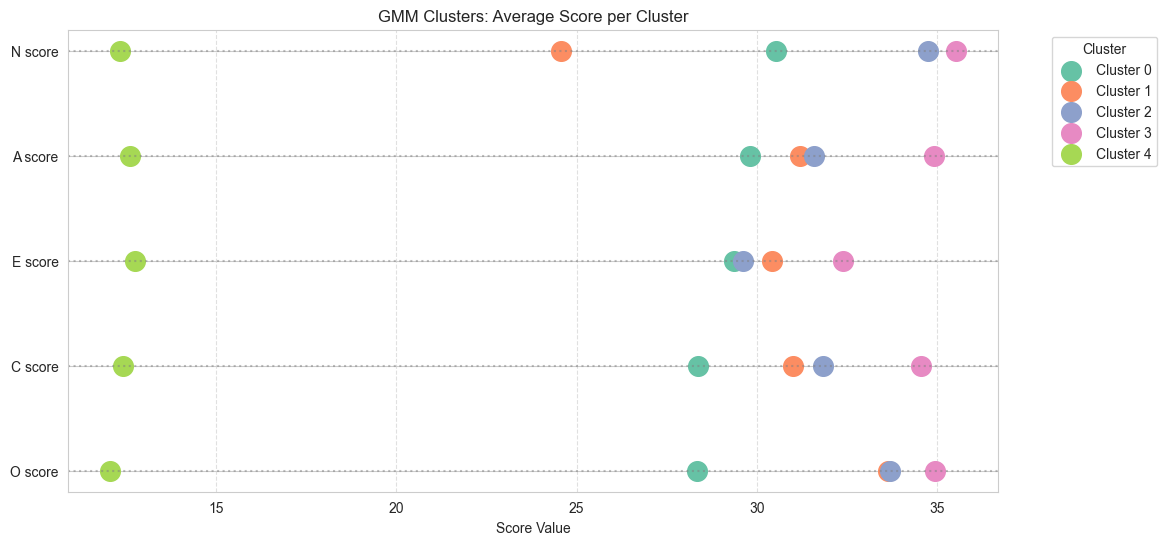

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the mean of each score per cluster
cluster_means = score_data.groupby("cluster").mean()

# Define colors for clusters
num_clusters = cluster_means.shape[0]
palette = sns.color_palette("Set2", num_clusters)

# Set up the figure
plt.figure(figsize=(12, 6))

# Loop through each score
for i, score in enumerate(cluster_means.columns):
    # Get cluster means for this score
    means = cluster_means[score]
    
    # Plot points on a number line
    for j, (cluster, value) in enumerate(means.items()):
        plt.scatter(value, i, color=palette[j], s=200, label=f"Cluster {cluster}" if i == 0 else "")

    # Add vertical lines for visual alignment
    plt.axhline(i, color="gray", linestyle="dotted", alpha=0.5)

# Customization
plt.yticks(range(len(cluster_means.columns)), cluster_means.columns)  # Label y-axis with score names
plt.xlabel("Score Value")
plt.title("GMM Clusters: Average Score per Cluster")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


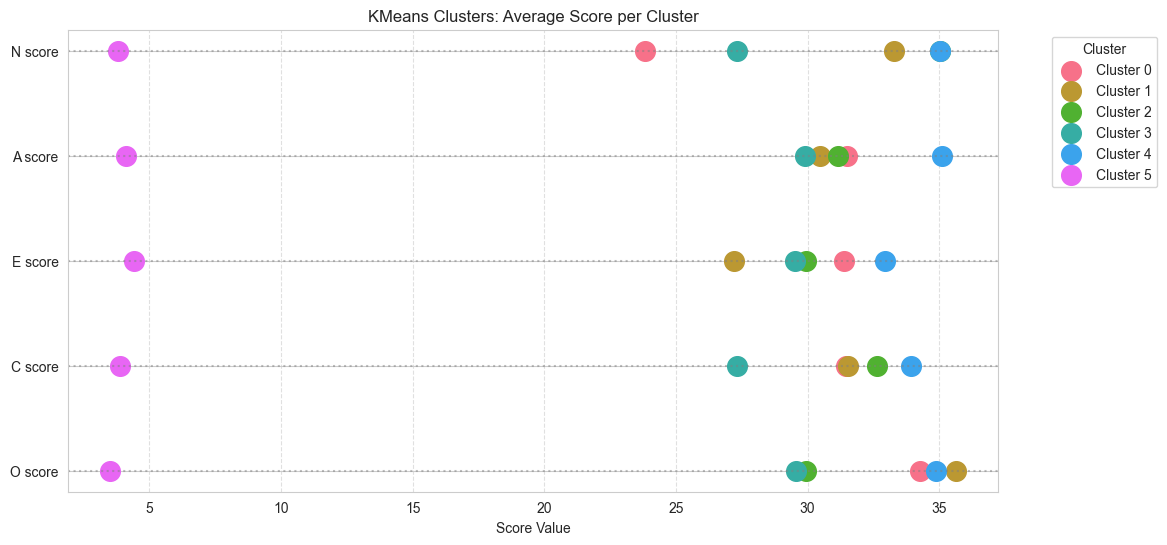

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the last 5 columns before 'cluster' in data_kmeans
score_data_kmeans = data_kmeans.iloc[:, -6:-1].copy()
score_data_kmeans["cluster"] = data_kmeans["cluster"]

# Compute the mean of each score per cluster
cluster_means_kmeans = score_data_kmeans.groupby("cluster").mean()

# Define colors for clusters
num_clusters_kmeans = cluster_means_kmeans.shape[0]
palette_kmeans = sns.color_palette("husl", num_clusters_kmeans)  # Different color palette for KMeans

# Set up the figure
plt.figure(figsize=(12, 6))

# Loop through each score
for i, score in enumerate(cluster_means_kmeans.columns):
    # Get cluster means for this score
    means = cluster_means_kmeans[score]
    
    # Plot points on a number line
    for j, (cluster, value) in enumerate(means.items()):
        plt.scatter(value, i, color=palette_kmeans[j], s=200, label=f"Cluster {cluster}" if i == 0 else "")

    # Add vertical lines for visual alignment
    plt.axhline(i, color="gray", linestyle="dotted", alpha=0.5)

# Customization
plt.yticks(range(len(cluster_means_kmeans.columns)), cluster_means_kmeans.columns)  # Label y-axis with score names
plt.xlabel("Score Value")
plt.title("KMeans Clusters: Average Score per Cluster")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


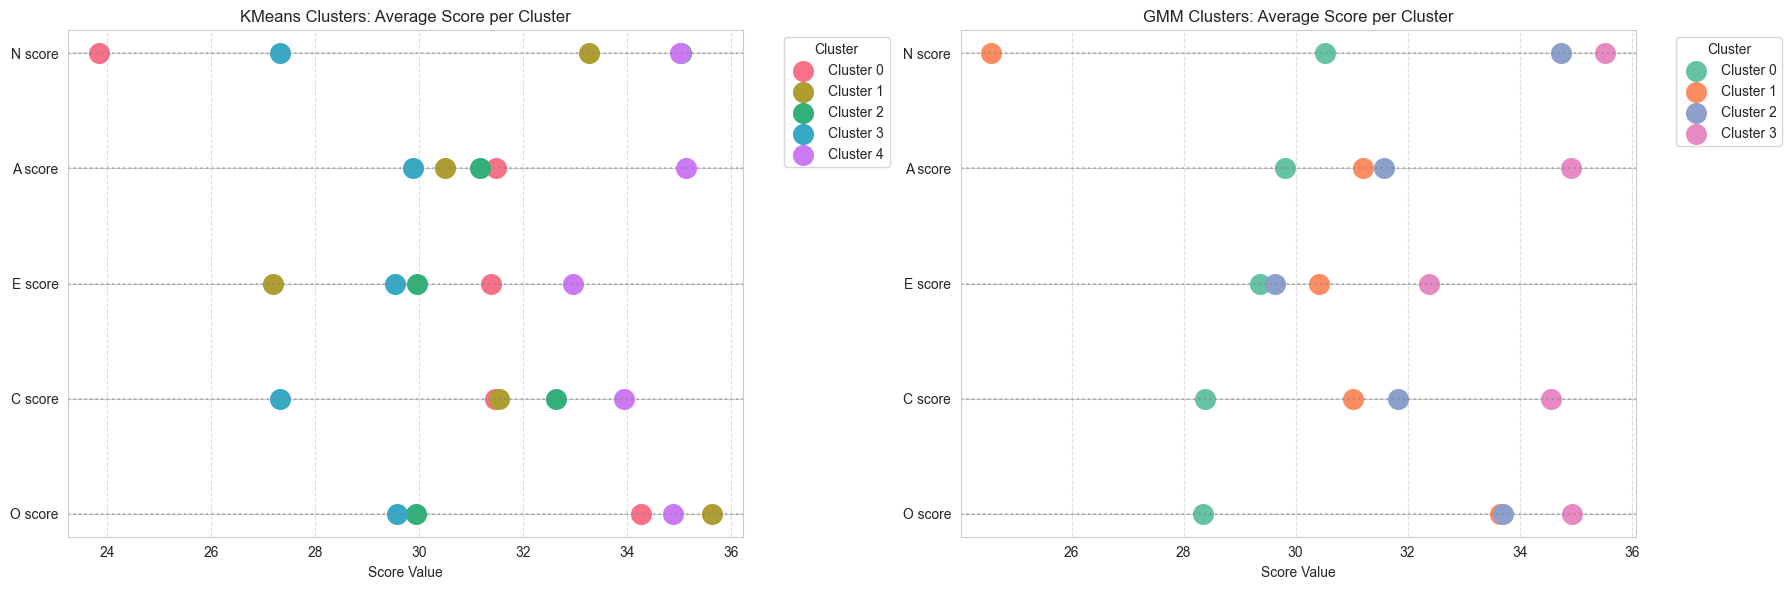

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a flag for whether to remove the lowest average cluster
remove_lowest_cluster = True  # Set to False to keep all clusters

# Function to calculate and filter the lowest average cluster if needed
def process_cluster_data(data, remove_lowest):
    # Extract the last 5 columns before 'cluster'
    score_data = data.iloc[:, -6:-1].copy()
    score_data["cluster"] = data["cluster"]

    # Compute the mean of each score per cluster
    cluster_means = score_data.groupby("cluster").mean()

    # If flag is True, remove the cluster with the lowest average for each score
    if remove_lowest:
        clusters_to_remove = set(cluster_means.idxmin().values)
        cluster_means = cluster_means.drop(index=clusters_to_remove)

    return cluster_means

# Process KMeans data
cluster_means_kmeans = process_cluster_data(data_kmeans, remove_lowest_cluster)

# Process GMM data (dropping the second-to-last column for the clustering)
cluster_means_gmm = process_cluster_data(data_gmm, remove_lowest_cluster)

# Define colors for clusters (we use different palettes for KMeans and GMM)
palette_kmeans = sns.color_palette("husl", cluster_means_kmeans.shape[0])
palette_gmm = sns.color_palette("Set2", cluster_means_gmm.shape[0])

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for KMeans
for i, score in enumerate(cluster_means_kmeans.columns):
    means = cluster_means_kmeans[score]
    for j, (cluster, value) in enumerate(means.items()):
        axes[0].scatter(value, i, color=palette_kmeans[j], s=200, label=f"Cluster {cluster}" if i == 0 else "")
    axes[0].axhline(i, color="gray", linestyle="dotted", alpha=0.5)

axes[0].set_yticks(range(len(cluster_means_kmeans.columns)))
axes[0].set_yticklabels(cluster_means_kmeans.columns)
axes[0].set_xlabel("Score Value")
axes[0].set_title("KMeans Clusters: Average Score per Cluster")
axes[0].legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
axes[0].grid(axis="x", linestyle="--", alpha=0.6)

# Plot for GMM
for i, score in enumerate(cluster_means_gmm.columns):
    means = cluster_means_gmm[score]
    for j, (cluster, value) in enumerate(means.items()):
        axes[1].scatter(value, i, color=palette_gmm[j], s=200, label=f"Cluster {cluster}" if i == 0 else "")
    axes[1].axhline(i, color="gray", linestyle="dotted", alpha=0.5)

axes[1].set_yticks(range(len(cluster_means_gmm.columns)))
axes[1].set_yticklabels(cluster_means_gmm.columns)
axes[1].set_xlabel("Score Value")
axes[1].set_title("GMM Clusters: Average Score per Cluster")
axes[1].legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
axes[1].grid(axis="x", linestyle="--", alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


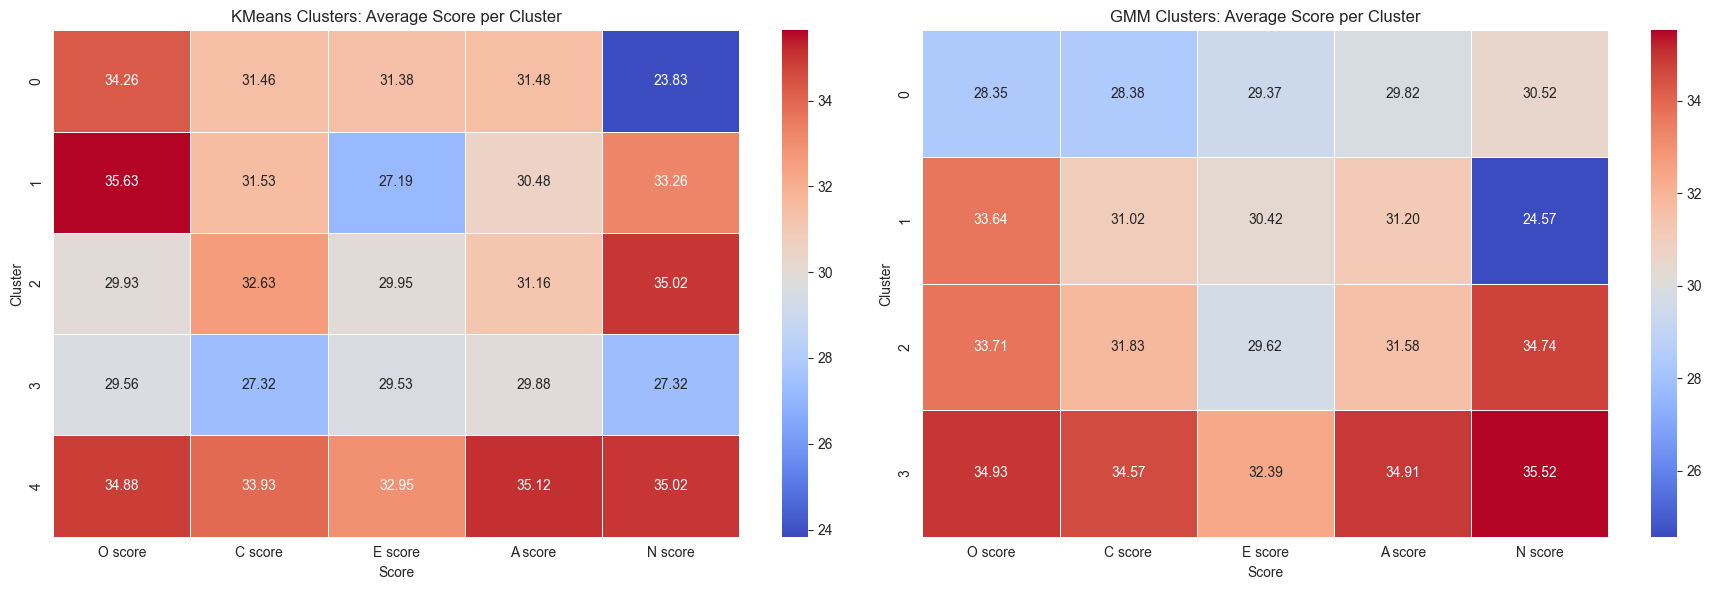

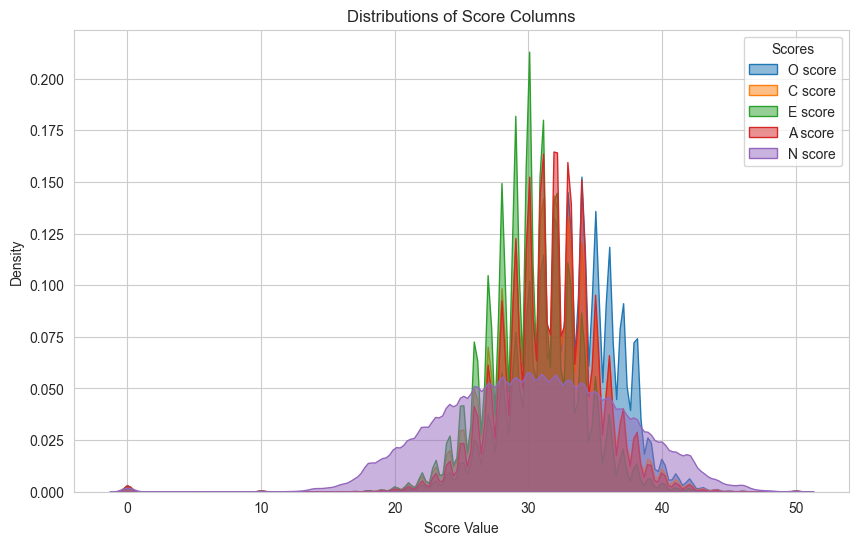

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a flag for whether to remove the lowest average cluster
remove_lowest_cluster = True  # Set to False to keep all clusters

# Function to calculate and filter the lowest average cluster if needed
def process_cluster_data(data, remove_lowest):
    # Extract the last 5 columns before 'cluster'
    score_data = data.iloc[:, -6:-1].copy()
    score_data["cluster"] = data["cluster"]

    # Compute the mean of each score per cluster
    cluster_means = score_data.groupby("cluster").mean()

    # If flag is True, remove the cluster with the lowest average for each score
    if remove_lowest:
        clusters_to_remove = set(cluster_means.idxmin().values)
        cluster_means = cluster_means.drop(index=clusters_to_remove)

    return cluster_means

# Process KMeans data
cluster_means_kmeans = process_cluster_data(data_kmeans, remove_lowest_cluster)

# Process GMM data
cluster_means_gmm = process_cluster_data(data_gmm, remove_lowest_cluster)

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot heatmap for KMeans
sns.heatmap(cluster_means_kmeans, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("KMeans Clusters: Average Score per Cluster")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Cluster")

# Plot heatmap for GMM
sns.heatmap(cluster_means_gmm, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("GMM Clusters: Average Score per Cluster")
axes[1].set_xlabel("Score")
axes[1].set_ylabel("Cluster")

# Show the plot
plt.tight_layout()
plt.show()

# Plot distributions of each score column (ignoring clusters)
fig, ax = plt.subplots(figsize=(10, 6))
score_columns = data_kmeans.iloc[:, -6:-1].columns

for col in score_columns:
    sns.kdeplot(data_kmeans[col], label=col, fill=True, alpha=0.5)

ax.set_title("Distributions of Score Columns")
ax.set_xlabel("Score Value")
ax.set_ylabel("Density")
ax.legend(title="Scores")
plt.show()


In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a flag for whether to remove the lowest average cluster
remove_lowest_cluster = False  # Set to True to remove the smallest cluster

# Function to count rows per cluster and compute percentage
def cluster_counts(data, remove_lowest):
    cluster_counts = data["cluster"].value_counts().sort_index()
    total_rows = len(data)
    cluster_percentages = (cluster_counts / total_rows) * 100
    
    # Remove the smallest cluster if flag is set
    if remove_lowest:
        smallest_cluster = cluster_percentages.idxmin()
        cluster_counts = cluster_counts.drop(index=smallest_cluster)
        cluster_percentages = cluster_percentages.drop(index=smallest_cluster)
    
    return cluster_counts, cluster_percentages

# Compute and display counts and percentages for KMeans
counts_kmeans, percents_kmeans = cluster_counts(data_kmeans, remove_lowest_cluster)
print("KMeans Cluster Counts and Percentages:")
print(pd.DataFrame({"Count": counts_kmeans, "Percentage": percents_kmeans.round(2)}))

# Compute and display counts and percentages for GMM
counts_gmm, percents_gmm = cluster_counts(data_gmm, remove_lowest_cluster)
print("\nGMM Cluster Counts and Percentages:")
print(pd.DataFrame({"Count": counts_gmm, "Percentage": percents_gmm.round(2)}))


KMeans Cluster Counts and Percentages:
          Count  Percentage
cluster                    
0        172538       24.80
1        134861       19.38
2        121564       17.47
3        134831       19.38
4        129117       18.56
5          2793        0.40

GMM Cluster Counts and Percentages:
          Count  Percentage
cluster                    
0        113134       16.26
1        256085       36.81
2        230572       33.14
3         91964       13.22
4          3949        0.57
